In this project, you’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

This data was originally sourced from 538’s Analysis of the **Complete History Of The NBA** and contains the original, unmodified data from **Basketball Reference** as well as several additional variables 538 added to perform their own analysis.

For this project we’ve limited the data to just 5 teams and 10 columns (plus one constructed column, **point_diff**, the difference between **pts** and **opp_pts**).

You will create several charts and tables in this project, so you’ll need to use **plt.clf()** between plots in your code so that the plots don’t layer on top of one another.

- **Analyzing relationships between Quant and Categorical**

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
np.set_printoptions(suppress=True, precision = 2)
nba = pd.read_csv('/content/nba_games.csv')
nba.head()


,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [13]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
#nba_2014 = nba[nba.year_id == 2014]

nba_2010.head()
#nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


In [14]:
# Subset Data to 2010 Season, 2014 Season
#nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

#nba_2010.head()
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


In [15]:
#Subset that represents the points 'Knicks' team has scored in their games to 2010 season
knicks_pts_10 = nba_2010.pts[nba.fran_id == 'Knicks']
knicks_pts_10.head()

21719     93
21725    100
21728    127
21734    117
21739     89
Name: pts, dtype: int64

In [16]:
#Subset that represents the points 'Nets' team has scored in their games to 2010 season
nets_pts_10 = nba_2010.pts[nba.fran_id == 'Nets']
nets_pts_10.head()

21720     93
21727     85
21730    104
21733     68
21738     94
Name: pts, dtype: int64

In [17]:
# difference of average points
diff_means_2010 = np.mean(knicks_pts_10) - np.mean(nets_pts_10)
diff_means_2010

9.731707317073173


Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful.

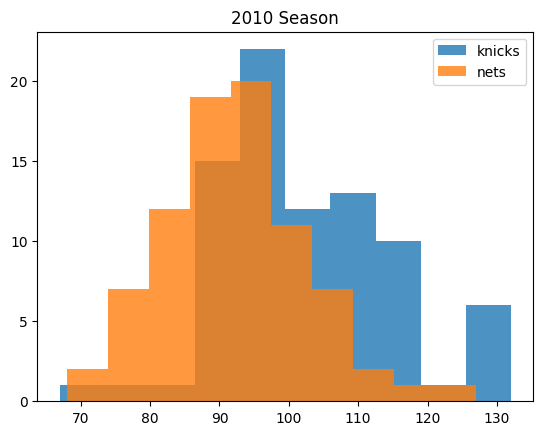

In [19]:
plt.hist(knicks_pts_10, alpha=0.8, label='knicks')
plt.hist(nets_pts_10, alpha=0.8, label='nets')
plt.legend()
plt.title("2010 Season")
plt.show()

In [20]:
#Subset that represents the points 'Knicks' has scored in their games to 2014 season
knicks_pts_14 = nba_2014.pts[nba.fran_id == 'Knicks']
knicks_pts_14.head()

23469     90
23473     81
23480    100
23486     97
23490    101
Name: pts, dtype: int64

In [21]:
nets_pts_14 = nba_2014.pts[nba.fran_id == 'Nets']
nets_pts_14.head()

23468     94
23475    101
23482     86
23484    104
23494    108
Name: pts, dtype: int64

In [22]:
diff_means_2014 = np.mean(knicks_pts_14) - np.mean(nets_pts_14)
diff_means_2014

0.44706798131809933

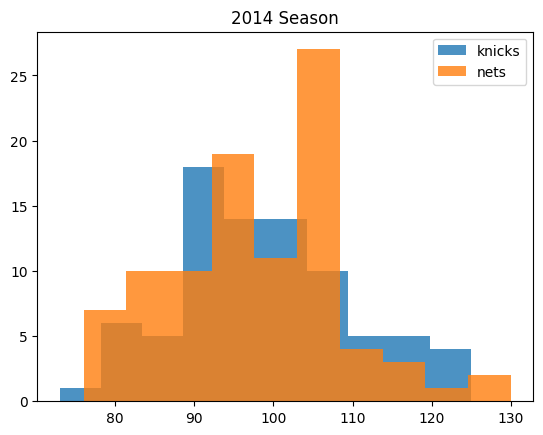

In [23]:
plt.hist(knicks_pts_14, alpha=0.8, label='knicks')
plt.hist(nets_pts_14, alpha=0.8, label='nets')
plt.legend()
plt.title("2014 Season")
plt.show()


For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

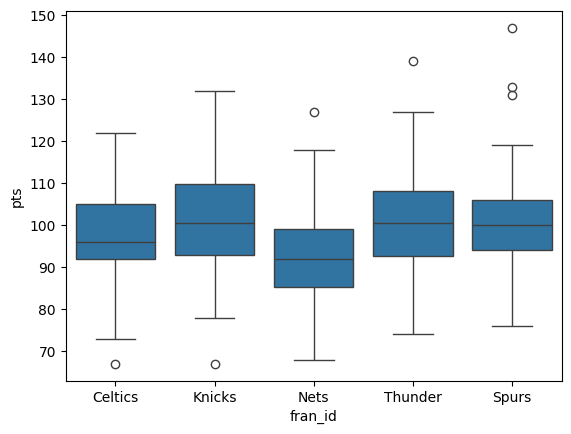

In [25]:
# clear the previous plot(if necessary) : plt.clf()
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()

 - **Analyzing relationships between Categorical variables**

We’d like to know if teams tend to win more games at home compared to away.

The variable game_result indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable game_location indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”).

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated.

In [27]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


To assess whether there is an association between these two variables, we need to ask whether information about one variable gives us information about the other.

In this example, we see that if game location is away from 'home', we have mostly loses (133). If game location is at 'home', we have mostly wins (120).

 This suggests that the variables are associated.

In [28]:
# Convert this table of frequencies to a table of proportions
location_result_proportions = location_result_freq/len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


The resulting contingency table makes it slightly easier to compare the proportion of people in each category. For example, we see that the two largest proportions in the table (.295 and .266) are in the A/L and H/W cells of the table.

In [29]:
# Contingency table
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(np.round(expected))

[[119. 119.]
 [106. 106.]]


The more that the expected and observed tables differ, the more sure we can be that the variables are associated. In this example, we see some pretty small differences. This provides some additional evidence that these variables are associated.

In [30]:
# Chi- Square statistic
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
chi2

6.501704455367053

The interpretation of the Chi-Square statistic is dependent on the size of the contingency table. For a 2x2 table (like the one we’ve been investigating), a Chi-Square statistic larger than around 4 would strongly suggest an association between the variables. In this example, our Chi-Square statistic is larger than that — 6.502. This adds to our evidence that the variables are associated.

- **Analyzing Relationships Between Quantitative Variables**

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points.



In [31]:
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_cov

array([[  0.05,   1.37],
       [  1.37, 186.56]])

The covariance between two variables (forecast, point_diff) is 1.37. A positive covariance indicates that a larger value of one variable is associated with a larger value of the other.

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

In [32]:
# Correlation
point_diff_forecast_corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_corr

0.4402088708468081

Like covariance, Pearson Correlation (often referred to simply as “correlation”) is a scaled form of covariance. It also measures the strength of a linear relationship, but ranges from -1 to +1, making it more interpretable.

Highly associated variables with a positive linear relationship will have a correlation close to 1. Highly associated variables with a negative linear relationship will have a correlation close to -1. Variables that do not have a linear association (or a linear association with a slope of zero) will have correlations close to 0.

Generally, a correlation larger than about .3 indicates a linear association. A correlation greater than about .6 suggestions a strong linear association.

One of the best ways to quickly visualize the relationship between quantitative variables is to plot them against each other in a scatter plot. This makes it easy to look for patterns or trends in the data.

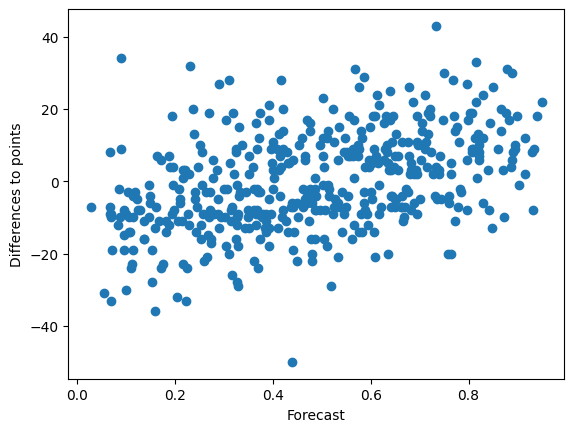

In [33]:
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
plt.xlabel('Forecast')
plt.ylabel('Differences to points')
plt.show()